## Objective of a Recommendation System:
The objective of a recommendation system, especially with a dataset like MovieLens 20M but here i am using subset of it, is to predict user preferences and suggest items (movies) they are likely to enjoy, enhancing user engagement and satisfaction by delivering personalized recommendations. It helps filter large amounts of data and offers relevant content based on individual tastes and behaviors.

A recommendation system is crucial in machine learning because it helps users discover relevant items (e.g., movies, products, or content) in large datasets based on their preferences and behaviors. Its primary objective is to improve user experience by filtering information and providing personalized suggestions, making content discovery more efficient.

In [1]:
#!pip install ipywidgets

# ipywidgets is a library for creating interactive user interface elements in Jupyter notebooks, 
# allowing for dynamic and engaging data exploration.

###  Importing All Necessary Libraries

In [2]:
import numpy as np              # NumPy is used for numerical operations, especially with arrays and matrices.
import pandas as pd             # Pandas is used for data manipulation and analysis, especially with DataFrames.
import matplotlib.pyplot as plt # Matplotlib is used for creating static, interactive, and animated visualizations in Python.
import seaborn as sns           # Seaborn is built on Matplotlib and is used for making statistical graphics easier to generate.
import ipywidgets as widgets    # Used for interactive widgets in Jupyter notebooks.

sns.set_style('white')          # This sets the aesthetic style of the plots to 'white' for a clean look.

#%matplotlib inline              # Ensures that Matplotlib plots are displayed inline in Jupyter notebooks.

# Set a color palette (you can choose from 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind')
sns.set_palette("muted")  # Use 'muted' palette for better visuals


### Importing the data through pandas dataframe object through read_csv


In [3]:
# Define the column names for the dataset
col_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Read the dataset from a CSV file, specifying the delimiter as tab ('\t') and assigning the column names
df = pd.read_csv('dataset.csv', sep='\t', names=col_names)

# Display the first few rows of the dataframe to check the contents
df.head()


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


### Now, I am importing the Movie Titles

In [4]:
mov_title = pd.read_csv('Mov_Titles.csv')
mov_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging the dataset with movies titles

In [5]:
# Merge the 'df' DataFrame with the 'mov_title' DataFrame on the 'item_id' column
df = pd.merge(df, mov_title, on='item_id', suffixes=('_df', '_mov'))

# Display the first few rows of the merged DataFrame to check the result
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


### Now, i will try to do some Exploratory Data Analysis

In [6]:
# Group the DataFrame by the 'title' column and calculate the mean rating for each title
# This groups the DataFrame by the title column and calculates the average rating for each unique title.
mean_ratings = df.groupby('title')['rating'].mean()

# Sort the mean ratings in descending order to get the highest ratings first
# This sorts the average ratings in descending order so that the titles with the highest average ratings appear first.
sorted_mean_ratings = mean_ratings.sort_values(ascending=False)

# Display the top 5 titles with the highest mean ratings
top_5_titles = sorted_mean_ratings.head()

# Print the top 5 titles with the highest mean ratings
print(top_5_titles)


title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64


In [7]:
# Group the DataFrame by the 'title' column and count the number of ratings for each title
# Groups the DataFrame by title and counts the number of ratings each title has received. 
# This tells us how many ratings are associated with each title.

rating_counts = df.groupby('title')['rating'].count()

# Sort the count of ratings in descending order to get the most rated titles first
# Sorts the count of ratings in descending order, so titles with the most ratings appear first.
sorted_rating_counts = rating_counts.sort_values(ascending=False)

# Display the top 5 titles with the highest number of ratings
top_5_most_rated_titles = sorted_rating_counts.head()

# Print the top 5 most rated titles and their rating counts
print(top_5_most_rated_titles)


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64


In [8]:
# Group the DataFrame by 'title' and calculate the mean rating for each title, then convert it into a new DataFrame
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

# Display the first few rows of the new 'ratings' DataFrame
ratings.head()


,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [9]:
# Create a new column 'numOfRatings' in the 'ratings' DataFrame that counts the number of ratings for each title
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())

# Display the first few rows of the updated 'ratings' DataFrame to check the result
ratings.head()


,rating,numOfRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### I will try to do some visualization

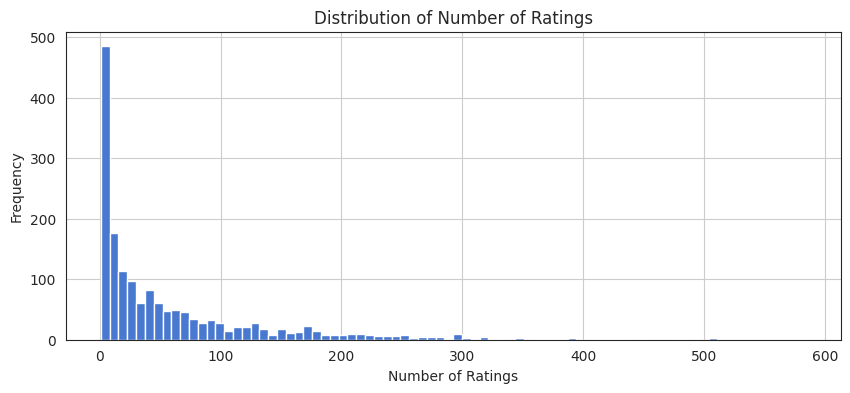

In [10]:
# Create a new figure with a specific size for better visibility (width=10, height=4)
plt.figure(figsize=(10, 4))

# Plot a histogram of the 'numOfRatings' column with 80 bins
ratings['numOfRatings'].hist(bins=80)

plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Plots a histogram of the numOfRatings column from the ratings DataFrame. This shows the distribution of how many ratings 
# each movie received. The bins=80 parameter creates 80 bins, which controls the granularity of the histogram, making the 
# distribution clearer

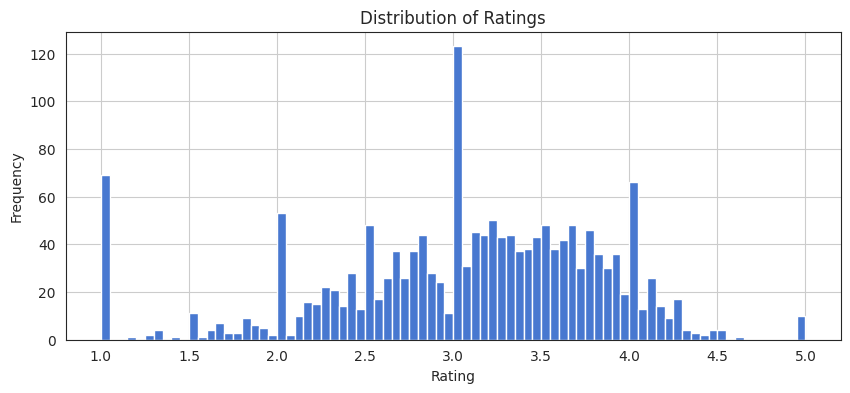

In [11]:
# Create a new figure with a specific size for better visibility (width=10, height=4)
plt.figure(figsize=(10, 4))

# Plot a histogram of the 'rating' column with 80 bins
ratings['rating'].hist(bins=80)

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Plots a histogram of the rating column from the ratings DataFrame. The bins=80 parameter divides the ratings into 
# 80 intervals, allowing for a more detailed view of the distribution of average ratings across different movies.

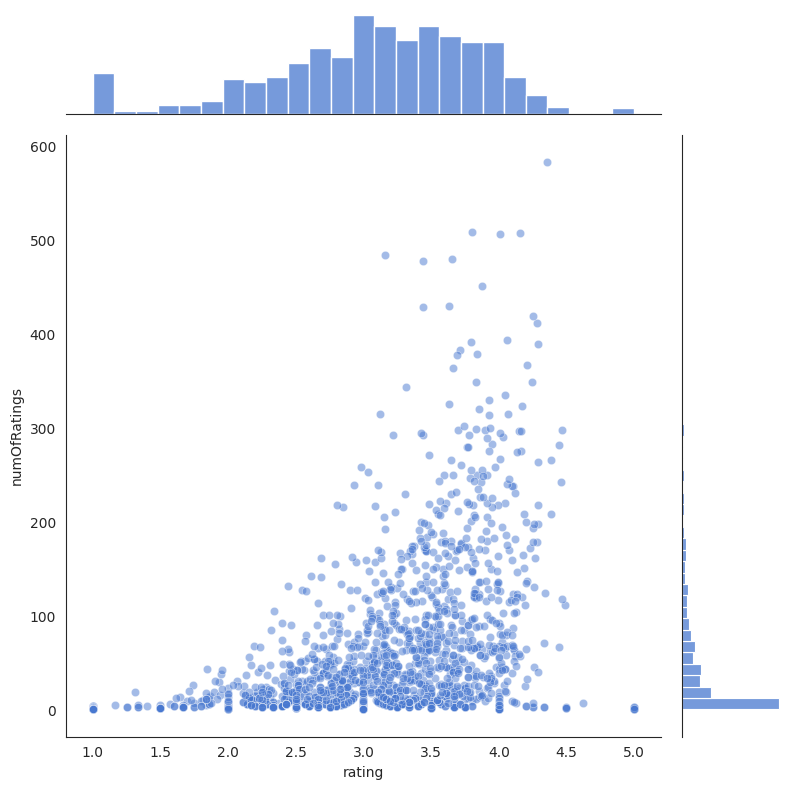

In [12]:
# Create a joint plot to visualize the relationship between 'rating' and 'numOfRatings' in the 'ratings' DataFrame

# Jointplot showing correlation between rating and number of ratings
sns.jointplot(x='rating', y='numOfRatings', data=ratings, alpha=0.5, height=8)
plt.show()


-> sns.jointplot: This function from the Seaborn library creates a joint plot, which combines two different plots:

-> A scatter plot to show the relationship between two variables (rating and numOfRatings in this case).

-> Marginal histograms or kernel density estimates (KDE) for each of the two variables on the axes.

-> x='rating': The rating column (average rating) is plotted on the x-axis.

-> y='numOfRatings': The numOfRatings column (number of ratings) is plotted on the y-axis.

-> data=ratings: This specifies the DataFrame (ratings) that contains the data.

-> alpha=0.5: Sets the transparency of the points in the scatter plot. A lower alpha value makes overlapping points more visible.

-> Understand the Relationship: The joint plot helps explore the relationship between average movie ratings (rating) and the number of ratings each movie received (numOfRatings). It can show whether more popular movies (those with a high number of ratings) tend to have higher or lower average ratings.

### Create the Recommendation System

Create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. 

Note there will be a lot of NaN values, because most people have not seen most of the movies.


In [13]:
# Create a pivot table with 'user_id' as the row index, 'title' as the column, and 'rating' as the values
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

# Display the first few rows of the pivot table to inspect the result
moviemat.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explanation

-> pivot_table(): This method reshapes the DataFrame into a pivot table format.
-> index='user_id': Each row in the pivot table corresponds to a unique user_id. This means each row represents one user.
-> columns='title': The columns represent movie titles. So, each column corresponds to a specific movie.
-> values='rating': The values in the pivot table are the ratings that users gave to the movies. If a user did not rate a particular movie, that cell will contain NaN (missing data).

-> A pivot_table is used to reshape data, summarizing it by organizing one variable into rows, another into columns, and showing values (like averages or counts) for quick analysis.


In [14]:
# Sort the 'ratings' DataFrame by the 'numOfRatings' column in descending order
# This brings the movies with the highest number of ratings to the top
top_10_most_rated = ratings.sort_values('numOfRatings', ascending=False).head(10)

# Display the top 10 movies with the highest number of ratings
print(top_10_most_rated)


# This sorts the ratings DataFrame by the numOfRatings column in descending order, so that the movies with 
# the most ratings are at the top.


                                 rating  numOfRatings
title                                                
Star Wars (1977)               4.359589           584
Contact (1997)                 3.803536           509
Fargo (1996)                   4.155512           508
Return of the Jedi (1983)      4.007890           507
Liar Liar (1997)               3.156701           485
English Patient, The (1996)    3.656965           481
Scream (1996)                  3.441423           478
Toy Story (1995)               3.878319           452
Air Force One (1997)           3.631090           431
Independence Day (ID4) (1996)  3.438228           429




Now we will create a correlation matrix of every movie with every other movie on user ratings. We will then use that correlation matrix to find top matches that relates the best for a particular movie (having atleast 100 ratings) and the result obtained (recommended movies) will then be added to the ratings dataframe of every movie. Those whose matches could not be obtained using correlation, their value will be converted to "-".


In [15]:
# Suppress divide by zero and invalid value warnings
np.seterr(divide='ignore', invalid='ignore')


# Loop through each movie title in the 'ratings' DataFrame index
for i in ratings.index:

    # Get the user ratings for the current movie 'i' from the 'moviemat' matrix
    MovieUserRatings = moviemat[i]

    # Calculate the correlation between user ratings of movie 'i' and all other movies
    SimilarToThatMovie = moviemat.corrwith(MovieUserRatings)

    # Convert the correlation values into a DataFrame with a column named 'Correlation'
    corr_toMovie = pd.DataFrame(SimilarToThatMovie, columns=['Correlation'])

    # Drop any rows with missing values (NaN) from the correlation DataFrame
    corr_toMovie.dropna(inplace=True)

    # Join the 'corr_toMovie' DataFrame with the 'numOfRatings' column from the 'ratings' DataFrame
    # This adds information about how many ratings each movie has, alongside the correlation data
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])

    # Filter the DataFrame to only include movies that have more than 100 ratings
    # Then sort these movies by the correlation value in descending order, and return the top results
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending=False).head()

    # Check if there are at least 5 movies in the result after filtering by number of ratings
    if result['numOfRatings'].count() >= 5:

        # Print the title of the current movie
        print(i)

        # Store the second most correlated movie (index 1) as the first recommendation for the current movie
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]

        # Store the third most correlated movie (index 2) as the second recommendation
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]

        # Store the fourth most correlated movie (index 3) as the third recommendation
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]

        # Store the fifth most correlated movie (index 4) as the fourth recommendation
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


'Til There Was You (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


1-900 (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


101 Dalmatians (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


12 Angry Men (1957)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


187 (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


2 Days in the Valley (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


20,000 Leagues Under the Sea (1954)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


2001: A Space Odyssey (1968)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


39 Steps, The (1935)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


8 1/2 (1963)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


8 Heads in a Duffel Bag (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


8 Seconds (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


A Chef in Love (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Above the Rim (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Absolute Power (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Abyss, The (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ace Ventura: Pet Detective (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ace Ventura: When Nature Calls (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Across the Sea of Time (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Addams Family Values (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Addicted to Love (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Addiction, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Adventures of Pinocchio, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Adventures of Priscilla, Queen of the Desert, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Adventures of Robin Hood, The (1938)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Affair to Remember, An (1957)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


African Queen, The (1951)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Afterglow (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Age of Innocence, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Air Bud (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Air Force One (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Air Up There, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Airheads (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Akira (1988)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Aladdin (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Aladdin and the King of Thieves (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Alaska (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Albino Alligator (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Alice in Wonderland (1951)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Alien (1979)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Alien 3 (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Alien: Resurrection (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Aliens (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


All About Eve (1950)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


All Dogs Go to Heaven 2 (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Alphaville (1965)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Amadeus (1984)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Amateur (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Amazing Panda Adventure, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


American Buffalo (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


American Dream (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


American President, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


American Strays (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


American Werewolf in London, An (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


American in Paris, An (1951)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Amistad (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Amityville 3-D (1983)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Amityville Curse, The (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Amityville Horror, The (1979)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Amityville II: The Possession (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Amos & Andrew (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


An Unforgettable Summer (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Anaconda (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Anastasia (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Andre (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Angel Baby (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Angel and the Badman (1947)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Angels and Insects (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Angels in the Outfield (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Angus (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Anna (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Anna Karenina (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Anne Frank Remembered (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Annie Hall (1977)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Another Stakeout (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Antonia's Line (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Aparajito (1956)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Apartment, The (1960)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Apocalypse Now (1979)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Apollo 13 (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Apostle, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Apple Dumpling Gang, The (1975)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


April Fool's Day (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Apt Pupil (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Aristocats, The (1970)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Army of Darkness (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Around the World in 80 Days (1956)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Arrival, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Arsenic and Old Lace (1944)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


As Good As It Gets (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Assassins (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Assignment, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Associate, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Audrey Rose (1977)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Austin Powers: International Man of Mystery (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Awfully Big Adventure, An (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ayn Rand: A Sense of Life (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


B*A*P*S (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Babe (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Baby-Sitters Club, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Babysitter, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Back to the Future (1985)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Backbeat (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bad Boys (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bad Company (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bad Girls (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bad Moon (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bad Taste (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ballad of Narayama, The (Narayama Bushiko) (1958)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Balto (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bananas (1971)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Band Wagon, The (1953)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Barb Wire (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Barbarella (1968)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Barcelona (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Basic Instinct (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Basketball Diaries, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Basquiat (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bastard Out of Carolina (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Batman & Robin (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Batman (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Batman Forever (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Batman Returns (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bean (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beans of Egypt, Maine, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beat the Devil (1954)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beautician and the Beast, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beautiful Girls (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beautiful Thing (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beauty and the Beast (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beavis and Butt-head Do America (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bed of Roses (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bedknobs and Broomsticks (1971)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Before Sunrise (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Before and After (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Before the Rain (Pred dozhdot) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Being Human (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Being There (1979)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Believers, The (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Belle de jour (1967)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ben-Hur (1959)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Benny & Joon (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bent (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Best Men (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Best of the Best 3: No Turning Back (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Better Off Dead... (1985)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beverly Hillbillies, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beverly Hills Cop III (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beverly Hills Ninja (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bewegte Mann, Der (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Beyond Rangoon (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bhaji on the Beach (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Big Blue, The (Grand bleu, Le) (1988)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Big Bully (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Big Green, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Big Lebowski, The (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Big Night (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Big Sleep, The (1946)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Big Squeeze, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Billy Madison (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bio-Dome (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Birdcage, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Birds, The (1963)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bitter Moon (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bitter Sugar (Azucar Amargo) (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Black Beauty (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Black Sheep (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blade Runner (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blink (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bliss (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blob, The (1958)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blood & Wine (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blood Beach (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blood For Dracula (Andy Warhol's Dracula) (1974)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bloodsport 2 (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blown Away (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blue Angel, The (Blaue Engel, Der) (1930)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blue Chips (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blue Sky (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blue in the Face (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blues Brothers 2000 (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Blues Brothers, The (1980)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bob Roberts (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Body Parts (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Body Snatcher, The (1945)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Body Snatchers (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bogus (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bonheur, Le (1965)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bonnie and Clyde (1967)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boogie Nights (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boomerang (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boot, Das (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Booty Call (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bottle Rocket (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bound (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boxing Helena (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boy's Life 2 (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boys (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boys Life (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boys of St. Vincent, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boys on the Side (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Boys, Les (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Brady Bunch Movie, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Braindead (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bram Stoker's Dracula (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Brassed Off (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Braveheart (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Brazil (1985)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bread and Chocolate (Pane e cioccolata) (1973)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Breakdown (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Breakfast at Tiffany's (1961)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Breaking the Waves (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bride of Frankenstein (1935)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bridge on the River Kwai, The (1957)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bridges of Madison County, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bringing Up Baby (1938)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Broken Arrow (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Broken English (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bronx Tale, A (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Brother Minister: The Assassination of Malcolm X (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Brothers McMullen, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Browning Version, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Buddy (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bulletproof (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bullets Over Broadway (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Burnt By the Sun (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Burnt Offerings (1976)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bushwhacked (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Butch Cassidy and the Sundance Kid (1969)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Bye Bye, Love (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


C'est arrivé près de chez vous (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cabin Boy (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cable Guy, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Calendar Girl (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Canadian Bacon (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Candidate, The (1972)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Candyman (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Candyman: Farewell to the Flesh (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cape Fear (1962)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cape Fear (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Captives (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Career Girls (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Carlito's Way (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Carmen Miranda: Bananas Is My Business (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Caro Diario (Dear Diary) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Carpool (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Carrie (1976)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Carried Away (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Carrington (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Casablanca (1942)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Casino (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Casper (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Castle Freak (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cat People (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cat on a Hot Tin Roof (1958)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cats Don't Dance (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Catwalk (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Caught (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Celluloid Closet, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Celtic Pride (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cement Garden, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cemetery Man (Dellamorte Dellamore) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Chain Reaction (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Chairman of the Board (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Chamber, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Charade (1963)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Chasers (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Chasing Amy (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Children of the Corn: The Gathering (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Children of the Revolution (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Chinatown (1974)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Christmas Carol, A (1938)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Chungking Express (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ciao, Professore! (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cinderella (1950)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cinema Paradiso (1988)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Circle of Friends (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Citizen Kane (1941)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Citizen Ruth (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


City Hall (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


City Slickers II: The Legend of Curly's Gold (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


City of Angels (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


City of Industry (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


City of Lost Children, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Clean Slate (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Clean Slate (Coup de Torchon) (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Clear and Present Danger (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Clerks (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Client, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cliffhanger (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Clockers (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Clockwork Orange, A (1971)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Close Shave, A (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Clueless (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cobb (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cold Comfort Farm (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Collectionneuse, La (1967)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Colonel Chabert, Le (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Color of Night (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Commandments (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Con Air (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Conan the Barbarian (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Condition Red (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Coneheads (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Congo (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Conspiracy Theory (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Contact (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Contempt (Mépris, Le) (1963)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Convent, The (Convento, O) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cook the Thief His Wife & Her Lover, The (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cool Hand Luke (1967)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cool Runnings (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cop Land (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cops and Robbersons (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Copycat (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Corrina, Corrina (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cosi (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Country Life (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Courage Under Fire (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cowboy Way, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Craft, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crash (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crimson Tide (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Critical Care (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cronos (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crooklyn (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crossfire (1947)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crossing Guard, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crow, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crow: City of Angels, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crows and Sparrows (1949)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crucible, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crumb (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cry, the Beloved Country (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Crying Game, The (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Curdled (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cure, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cutthroat Island (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Cyrano de Bergerac (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


D3: The Mighty Ducks (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dances with Wolves (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dangerous Beauty (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dangerous Ground (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dangerous Minds (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Daniel Defoe's Robinson Crusoe (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dante's Peak (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dark City (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dave (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Davy Crockett, King of the Wild Frontier (1955)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Day the Earth Stood Still, The (1951)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Day the Sun Turned Cold, The (Tianguo niezi) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Daylight (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Days of Thunder (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Daytrippers, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dazed and Confused (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dead Man (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dead Man Walking (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dead Poets Society (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dead Presidents (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dear God (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Death and the Maiden (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Deceiver (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Deconstructing Harry (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Deep Rising (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Deer Hunter, The (1978)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Delicatessen (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Delta of Venus (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Demolition Man (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Denise Calls Up (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Designated Mourner, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Desperado (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Desperate Measures (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Devil in a Blue Dress (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Devil's Advocate, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Devil's Own, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Diabolique (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dial M for Murder (1954)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Die Hard (1988)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Die Hard 2 (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Die Hard: With a Vengeance (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Die xue shuang xiong (Killer, The) (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dingo (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dirty Dancing (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Disclosure (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Diva (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dolores Claiborne (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Don Juan DeMarco (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Donnie Brasco (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Doom Generation, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Doors, The (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Double Happiness (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Double Team (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Double vie de Véronique, La (Double Life of Veronique, The) (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Down Periscope (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Down by Law (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dracula: Dead and Loving It (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dragonheart (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dream Man (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dream With the Fishes (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Drop Dead Fred (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Drop Zone (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Drunks (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Duck Soup (1933)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dumb & Dumber (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dumbo (1941)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Dunston Checks In (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Duoluo tianshi (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


E.T. the Extra-Terrestrial (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


East of Eden (1955)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Eat Drink Man Woman (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ed (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ed Wood (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ed's Next Move (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Eddie (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Edge, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Emma (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Empire Strikes Back, The (1980)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Enchanted April (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Endless Summer 2, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Enfer, L' (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


English Patient, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Eraser (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Escape from L.A. (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Escape from New York (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Escape to Witch Mountain (1975)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Eve's Bayou (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Even Cowgirls Get the Blues (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Evening Star, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Event Horizon (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Everest (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Everyone Says I Love You (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Evil Dead II (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Evita (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Excess Baggage (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Executive Decision (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Exit to Eden (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Exotica (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Extreme Measures (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Eye for an Eye (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Face/Off (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Faces (1968)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fair Game (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


FairyTale: A True Story (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Faithful (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fall (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fallen (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Family Thing, A (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fan, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fantasia (1940)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Far From Home: The Adventures of Yellow Dog (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Farewell My Concubine (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Farewell to Arms, A (1932)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fargo (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Farinelli: il castrato (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fast, Cheap & Out of Control (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Faster Pussycat! Kill! Kill! (1965)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fatal Instinct (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Father of the Bride (1950)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Father of the Bride Part II (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fathers' Day (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Faust (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fausto (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fear (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fear of a Black Hat (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fearless (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Feast of July (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Feeling Minnesota (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Female Perversions (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Field of Dreams (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fierce Creatures (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fifth Element, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fille seule, La (A Single Girl) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fire Down Below (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Firestorm (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Firm, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


First Kid (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


First Knight (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


First Wives Club, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fish Called Wanda, A (1988)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fled (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Flesh and Bone (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Flintstones, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Flipper (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Flirt (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Flirting With Disaster (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Flower of My Secret, The (Flor de mi secreto, La) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Flubber (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fluke (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fly Away Home (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fog, The (1980)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fools Rush In (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


For Ever Mozart (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


For Love or Money (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


For Richer or Poorer (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


For Whom the Bell Tolls (1943)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


For the Moment (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Forbidden Christ, The (Cristo proibito, Il) (1950)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Forbidden Planet (1956)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Foreign Correspondent (1940)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Forget Paris (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Forrest Gump (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Four Days in September (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Four Rooms (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Four Weddings and a Funeral (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fox and the Hound, The (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Foxfire (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Frankie Starlight (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Free Willy (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Free Willy 2: The Adventure Home (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Free Willy 3: The Rescue (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Freeway (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


French Kiss (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


French Twist (Gazon maudit) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fresh (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Friday (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fried Green Tomatoes (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Frighteners, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Frisk (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


From Dusk Till Dawn (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Fugitive, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Full Metal Jacket (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Full Monty, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Full Speed (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Funeral, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Funny Face (1957)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


G.I. Jane (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gabbeh (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Game, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gandhi (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gang Related (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (1970)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gaslight (1944)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gattaca (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gay Divorcee, The (1934)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


George of the Jungle (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Georgia (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Germinal (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Geronimo: An American Legend (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Get Shorty (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Get on the Bus (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Getaway, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Getting Even with Dad (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ghost (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ghost and Mrs. Muir, The (1947)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ghost and the Darkness, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ghost in the Shell (Kokaku kidotai) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ghosts of Mississippi (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Giant (1956)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gigi (1958)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gilligan's Island: The Movie (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Girl 6 (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Glass Shield, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Glengarry Glen Ross (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Glimmer Man, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Glory (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Go Fish (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Godfather, The (1972)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Godfather: Part II, The (1974)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gold Diggers: The Secret of Bear Mountain (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Golden Earrings (1947)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


GoldenEye (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gone Fishin' (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gone with the Wind (1939)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Good Man in Africa, A (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Good Will Hunting (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Good, The Bad and The Ugly, The (1966)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


GoodFellas (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Goofy Movie, A (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grace of My Heart (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Graduate, The (1967)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grand Day Out, A (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grass Harp, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grateful Dead (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grease (1978)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grease 2 (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Great Dictator, The (1940)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Great Escape, The (1963)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Great Expectations (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Great Race, The (1965)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Great White Hype, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gridlock'd (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grifters, The (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grosse Fatigue (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grosse Pointe Blank (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Groundhog Day (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Grumpier Old Men (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Guantanamera (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Guilty as Sin (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Gumby: The Movie (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hackers (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Half Baked (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Halloween: The Curse of Michael Myers (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hamlet (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Happy Gilmore (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hard Eight (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hard Rain (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hard Target (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Harlem (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Harold and Maude (1971)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Harriet the Spy (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hate (Haine, La) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Haunted World of Edward D. Wood Jr., The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Head Above Water (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hear My Song (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hearts and Minds (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Heat (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Heathers (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Heaven & Earth (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Heaven's Prisoners (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Heavenly Creatures (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Heavy (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Heavy Metal (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Heavyweights (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Heidi Fleiss: Hollywood Madam (1995) 


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hellraiser: Bloodline (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Henry V (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Herbie Rides Again (1974)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hercules (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hideaway (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


High Noon (1952)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


High School High (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Higher Learning (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Highlander (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Highlander III: The Sorcerer (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


His Girl Friday (1940)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hollow Reed (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Home Alone (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Home Alone 3 (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Home for the Holidays (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Homeward Bound II: Lost in San Francisco (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Homeward Bound: The Incredible Journey (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hoodlum (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hoop Dreams (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Horse Whisperer, The (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Horseman on the Roof, The (Hussard sur le toit, Le) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hot Shots! Part Deux (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hotel de Love (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hour of the Pig, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


House Arrest (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


House Party 3 (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


House of Yes, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


House of the Spirits, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Houseguest (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


How to Be a Player (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


How to Make an American Quilt (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Howling, The (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hudsucker Proxy, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hugo Pool (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hunchback of Notre Dame, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hunt for Red October, The (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hunted, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Hurricane Streets (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


I Can't Sleep (J'ai pas sommeil) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


I Know What You Did Last Summer (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


I Like It Like That (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


I Love Trouble (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


I Shot Andy Warhol (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


I'll Do Anything (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


I'm Not Rappaport (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


I.Q. (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ice Storm, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


If Lucy Fell (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ill Gotten Gains (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Immortal Beloved (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In & Out (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In Love and War (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In the Army Now (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In the Bleak Midwinter (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In the Company of Men (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In the Line of Duty 2 (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In the Line of Fire (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In the Mouth of Madness (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In the Name of the Father (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In the Realm of the Senses (Ai no corrida) (1976)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Incognito (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Independence Day (ID4) (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Indian Summer (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Indian in the Cupboard, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Indiana Jones and the Last Crusade (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Infinity (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Inkwell, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Innocent Sleep, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Innocents, The (1961)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Inspector General, The (1949)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Interview with the Vampire (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Inventing the Abbotts (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Island of Dr. Moreau, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


It Could Happen to You (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


It Happened One Night (1934)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


It Takes Two (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


It's My Party (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


It's a Wonderful Life (1946)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jack (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jack and Sarah (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jackal, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jackie Brown (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jackie Chan's First Strike (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jade (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


James and the Giant Peach (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jane Eyre (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jason's Lyric (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jaws (1975)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jaws 2 (1978)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jaws 3-D (1983)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jean de Florette (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jefferson in Paris (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jeffrey (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jerky Boys, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jerry Maguire (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jimmy Hollywood (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jingle All the Way (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Joe's Apartment (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Johnny 100 Pesos (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Johnny Mnemonic (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Journey of August King, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Joy Luck Club, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jude (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Judge Dredd (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Judgment Night (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jumanji (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jungle Book, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jungle2Jungle (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Junior (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jurassic Park (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Juror, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Jury Duty (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Just Cause (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kalifornia (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kama Sutra: A Tale of Love (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kansas City (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kaspar Hauser (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kazaam (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Keys to Tulsa (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kicked in the Head (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kicking and Screaming (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kid in King Arthur's Court, A (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kids (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kids in the Hall: Brain Candy (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Killer (Bulletproof Heart) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Killing Fields, The (1984)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Killing Zoe (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kim (1950)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


King of the Hill (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kingpin (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kiss Me, Guido (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kiss of Death (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kiss the Girls (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kissed (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kolya (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Koyaanisqatsi (1983)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kull the Conqueror (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Kundun (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


L.A. Confidential (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ladybird Ladybird (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lamerica (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Land Before Time III: The Time of the Great Giving (1995) (V)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Larger Than Life (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lassie (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Last Action Hero (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Last Dance (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Last Klezmer: Leopold Kozlowski, His Life and Music, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Last Man Standing (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Last Summer in the Hamptons (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Last Supper, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Last Time I Committed Suicide, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Last Time I Saw Paris, The (1954)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Last of the Mohicans, The (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Late Bloomers (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Laura (1944)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lawnmower Man 2: Beyond Cyberspace (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lawnmower Man, The (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lawrence of Arabia (1962)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lay of the Land, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Leading Man, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Leave It to Beaver (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Leaving Las Vegas (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Legal Deceit (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Legends of the Fall (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Letter From Death Row, A (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Liar Liar (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Life Less Ordinary, A (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Life with Mikey (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lightning Jack (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Like Water For Chocolate (Como agua para chocolate) (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Line King: Al Hirschfeld, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lion King, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Little Big League (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Little Buddha (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Little Lord Fauntleroy (1936)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Little Odessa (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Little Princess, A (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Little Princess, The (1939)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Little Rascals, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Little Women (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Live Nude Girls (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Living in Oblivion (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Loaded (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Local Hero (1983)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Loch Ness (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Locusts, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lone Star (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Long Kiss Goodnight, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Looking for Richard (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lord of Illusions (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Losing Chase (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Losing Isaiah (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lost Highway (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lost Horizon (1937)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lost World: Jurassic Park, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lost in Space (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love & Human Remains (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love Affair (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love Bug, The (1969)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love Jones (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love Serenade (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love and Death on Long Island (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love and Other Catastrophes (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love and a .45 (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love in the Afternoon (1957)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Love! Valour! Compassion! (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Lover's Knot (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Low Down Dirty Shame, A (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


M (1931)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


M*A*S*H (1970)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


M. Butterfly (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ma vie en rose (My Life in Pink) (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Machine, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mad City (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mad Love (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Madame Butterfly (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Made in America (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Madness of King George, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Madonna: Truth or Dare (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Magic Hour, The (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Magnificent Seven, The (1954)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Major Payne (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Malice (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mallrats (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Maltese Falcon, The (1941)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Man Who Knew Too Little, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Man Who Would Be King, The (1975)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Man Without a Face, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Man in the Iron Mask, The (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Man of No Importance, A (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Man of the House (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Man of the Year (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Manchurian Candidate, The (1962)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Manhattan (1979)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Manhattan Murder Mystery (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Manny & Lo (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Manon of the Spring (Manon des sources) (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Margaret's Museum (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mark of Zorro, The (1940)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Marked for Death (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mars Attacks! (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Marvin's Room (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mary Poppins (1964)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mary Reilly (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mary Shelley's Frankenstein (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mask, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


MatchMaker, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Matilda (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Maverick (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Maximum Risk (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Maya Lin: A Strong Clear Vision (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Maybe, Maybe Not (Bewegte Mann, Der) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


McHale's Navy (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mediterraneo (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Meet John Doe (1941)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Meet Me in St. Louis (1944)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Meet Wally Sparks (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Men With Guns (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Men in Black (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Men of Means (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Menace II Society (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mercury Rising (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Metisse (Café au Lait) (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Metro (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Miami Rhapsody (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Michael (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Michael Collins (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Microcosmos: Le peuple de l'herbe (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Midnight Dancers (Sibak) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Midnight in the Garden of Good and Evil (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mighty Aphrodite (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mighty Morphin Power Rangers: The Movie (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Milk Money (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Miller's Crossing (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mimic (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mina Tannenbaum (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Miracle on 34th Street (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mirror Has Two Faces, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mission: Impossible (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Misérables, Les (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mixed Nuts (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Moll Flanders (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mondo (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Money Talks (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Money Train (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Month by the Lake, A (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Monty Python and the Holy Grail (1974)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Monty Python's Life of Brian (1979)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Moonlight and Valentino (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mortal Kombat (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mortal Kombat: Annihilation (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mother (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mother Night (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mouse Hunt (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mr. Holland's Opus (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mr. Jones (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mr. Magoo (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mr. Smith Goes to Washington (1939)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mr. Wrong (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mrs. Brown (Her Majesty, Mrs. Brown) (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mrs. Dalloway (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mrs. Doubtfire (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mrs. Parker and the Vicious Circle (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mrs. Winterbourne (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Much Ado About Nothing (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mulholland Falls (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Multiplicity (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Muppet Treasure Island (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Murder at 1600 (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Murder in the First (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Murder, My Sweet (1944)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Muriel's Wedding (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mute Witness (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Best Friend's Wedding (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Crazy Life (Mi vida loca) (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Fair Lady (1964)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Family (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Favorite Season (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Favorite Year (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Fellow Americans (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Left Foot (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Life and Times With Antonin Artaud (En compagnie d'Antonin Artaud) (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Life as a Dog (Mitt liv som hund) (1985)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Man Godfrey (1936)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


My Own Private Idaho (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Mystery Science Theater 3000: The Movie (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nadja (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Naked (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Naked Gun 33 1/3: The Final Insult (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Naked in New York (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


National Lampoon's Senior Trip (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Natural Born Killers (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nell (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nelly & Monsieur Arnaud (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Neon Bible, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Net, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


NeverEnding Story III, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


New Jersey Drive (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


New York Cop (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Newton Boys, The (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Next Karate Kid, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nick of Time (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nico Icon (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Night Falls on Manhattan (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Night Flier (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Night of the Living Dead (1968)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Night on Earth (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nightmare Before Christmas, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nightmare on Elm Street, A (1984)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nightwatch (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nikita (La Femme Nikita) (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nil By Mouth (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nina Takes a Lover (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nine Months (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ninotchka (1939)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nixon (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


No Escape (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nobody's Fool (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


North (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


North by Northwest (1959)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nosferatu a Venezia (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nothing to Lose (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Notorious (1946)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Now and Then (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nowhere (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nutty Professor, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Nénette et Boni (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Of Human Bondage (1934)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Of Love and Shadows (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Old Man and the Sea, The (1958)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Old Yeller (1957)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Oliver & Company (1988)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Omen, The (1976)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


On Golden Pond (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Once Upon a Time in America (1984)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Once Upon a Time in the West (1969)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Once Upon a Time... When We Were Colored (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Once Were Warriors (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


One Fine Day (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


One Flew Over the Cuckoo's Nest (1975)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


One Night Stand (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Only You (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Open Season (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Operation Dumbo Drop (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Original Gangstas (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Orlando (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Oscar & Lucinda (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Othello (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Out to Sea (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Outbreak (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Outlaw, The (1943)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pagemaster, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pallbearer, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Palmetto (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Palookaville (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Panther (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Paper, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Paradise Lost: The Child Murders at Robin Hood Hills (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Paradise Road (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Parent Trap, The (1961)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Paris Is Burning (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Paris, France (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Paris, Texas (1984)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Party Girl (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Passion Fish (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pather Panchali (1955)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Paths of Glory (1957)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Patton (1970)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Peacemaker, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Penny Serenade (1941)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


People vs. Larry Flynt, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Perez Family, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Perfect Candidate, A (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Perfect World, A (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Persuasion (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pest, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pete's Dragon (1977)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Phantom, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Phantoms (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Phat Beach (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Phenomenon (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Philadelphia (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Philadelphia Story, The (1940)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Piano, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Picnic (1955)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Picture Bride (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Picture Perfect (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pie in the Sky (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pillow Book, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pink Floyd - The Wall (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pinocchio (1940)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Platoon (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Playing God (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pocahontas (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Poetic Justice (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Poison Ivy II (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pollyanna (1960)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pompatus of Love, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ponette (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Portrait of a Lady, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Postino, Il (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Postman, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Powder (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Preacher's Wife, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pretty Woman (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Price Above Rubies, A (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Priest (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Primal Fear (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Primary Colors (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Princess Bride, The (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Princess Caraboo (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Prisoner of the Mountains (Kavkazsky Plennik) (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Private Benjamin (1980)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Private Parts (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Professional, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Program, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Promesse, La (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Prophecy II, The (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Prophecy, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Psycho (1960)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pulp Fiction (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pump Up the Volume (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Purple Noon (1960)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pushing Hands (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Pyromaniac's Love Story, A (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Queen Margot (Reine Margot, La) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Quest, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Quick and the Dead, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Quiet Man, The (1952)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Quiet Room, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Quiz Show (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Race the Sun (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Radioland Murders (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Raging Bull (1980)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Raiders of the Lost Ark (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rainmaker, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Raise the Red Lantern (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Raising Arizona (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ran (1985)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ransom (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ready to Wear (Pret-A-Porter) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Real Genius (1985)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Reality Bites (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rear Window (1954)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rebecca (1940)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rebel Without a Cause (1955)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Reckless (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Red Corner (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Red Firecracker, Green Firecracker (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Red Rock West (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ref, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Relative Fear (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Relic, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Remains of the Day, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Renaissance Man (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rendezvous in Paris (Rendez-vous de Paris, Les) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rent-a-Kid (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Replacement Killers, The (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Reservoir Dogs (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Restoration (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Return of the Jedi (1983)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Return of the Pink Panther, The (1974)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rhyme & Reason (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rich Man's Wife, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Richard III (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Richie Rich (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ridicule (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Right Stuff, The (1983)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rising Sun (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


River Wild, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Road to Wellville, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rob Roy (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Robert A. Heinlein's The Puppet Masters (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Robin Hood: Men in Tights (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Robin Hood: Prince of Thieves (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Robocop 3 (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rock, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rocket Man (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Roman Holiday (1953)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Romeo Is Bleeding (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Romper Stomper (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Romy and Michele's High School Reunion (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Room with a View, A (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Roommates (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Roseanna's Grave (For Roseanna) (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rosencrantz and Guildenstern Are Dead (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rosewood (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rough Magic (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ruby in Paradise (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rudy (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ruling Class, The (1972)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Rumble in the Bronx (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Run of the Country, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


S.F.W. (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sabrina (1954)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sabrina (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Safe (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Safe Passage (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Saint, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Salut cousin! (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Santa Clause, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Savage Nights (Nuits fauves, Les) (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Scarlet Letter, The (1926)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Scarlet Letter, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Schindler's List (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Schizopolis (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Scout, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Scream (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Scream 2 (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Screamers (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Search for One-eye Jimmy, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Searching for Bobby Fischer (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Second Jungle Book: Mowgli & Baloo, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Secret Adventures of Tom Thumb, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Secret Agent, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Secret Garden, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Secret of Roan Inish, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Secrets & Lies (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Selena (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sense and Sensibility (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Senseless (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Serial Mom (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Set It Off (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Seven (Se7en) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Seven Years in Tibet (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Seventh Seal, The (Sjunde inseglet, Det) (1957)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sex, Lies, and Videotape (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sexual Life of the Belgians, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sgt. Bilko (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shadow Conspiracy (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shadow, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shadowlands (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shaggy Dog, The (1959)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shall We Dance? (1937)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shall We Dance? (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shallow Grave (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shawshank Redemption, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


She's So Lovely (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


She's the One (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shiloh (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shine (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shining, The (1980)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shooter, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Shooting Fish (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Short Cuts (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Show, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Showgirls (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Silence of the Lambs, The (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Simple Twist of Fate, A (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Simple Wish, A (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Singin' in the Rain (1952)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sirens (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Six Degrees of Separation (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sixth Man, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sleeper (1973)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sleepers (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sleepless in Seattle (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sliding Doors (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sling Blade (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Slingshot, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sliver (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Smile Like Yours, A (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Smilla's Sense of Snow (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Smoke (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sneakers (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Snow White and the Seven Dwarfs (1937)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


So Dear to My Heart (1949)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


So I Married an Axe Murderer (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Solo (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Some Folks Call It a Sling Blade (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Some Kind of Wonderful (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Some Like It Hot (1959)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Some Mother's Son (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Something to Talk About (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Somewhere in Time (1980)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Son in Law (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sophie's Choice (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Soul Food (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sound of Music, The (1965)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Space Jam (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Spanking the Monkey (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Spawn (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Specialist, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Species (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Speechless (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Speed (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Speed 2: Cruise Control (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Spellbound (1945)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sphere (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Spice World (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Spirits of the Dead (Tre passi nel delirio) (1968)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Spitfire Grill, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Spy Hard (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Squeeze (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stag (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stalingrad (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stalker (1979)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stand by Me (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Maker, The (Uomo delle stelle, L') (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Maps (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Trek III: The Search for Spock (1984)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Trek IV: The Voyage Home (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Trek V: The Final Frontier (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Trek VI: The Undiscovered Country (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Trek: First Contact (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Trek: Generations (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Trek: The Motion Picture (1979)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Trek: The Wrath of Khan (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Star Wars (1977)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stargate (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stars Fell on Henrietta, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Starship Troopers (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Steal Big, Steal Little (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stealing Beauty (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Steel (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stephen King's The Langoliers (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sting, The (1973)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stonewall (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Story of Xinghua, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Strange Days (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stranger in the House (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stranger, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Strawberry and Chocolate (Fresa y chocolate) (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Street Fighter (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Streetcar Named Desire, A (1951)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Strictly Ballroom (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Striking Distance (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stripes (1981)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Striptease (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stuart Saves His Family (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Stupids, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


SubUrbia (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Substance of Fire, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Substitute, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sudden Death (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sudden Manhattan (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sum of Us, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sunset Blvd. (1950)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sunset Park (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Super Mario Bros. (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Supercop (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Surviving Picasso (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Surviving the Game (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Suture (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Swan Princess, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sweet Hereafter, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Swept from the Sea (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Swimming with Sharks (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Swingers (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Swiss Family Robinson (1960)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Switchback (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Switchblade Sisters (1975)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Sword in the Stone, The (1963)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tales From the Crypt Presents: Demon Knight (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tales from the Crypt Presents: Bordello of Blood (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tales from the Hood (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Talking About Sex (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tango Lesson, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tank Girl (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Taxi Driver (1976)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Telling Lies in America (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Temptress Moon (Feng Yue) (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Terminal Velocity (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Terminator 2: Judgment Day (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Terminator, The (1984)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tetsuo II: Body Hammer (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


That Darn Cat! (1965)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


That Darn Cat! (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


That Old Feeling (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


That Thing You Do! (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


The Deadly Cure (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


The Innocent (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Theodore Rex (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Thieves (Voleurs, Les) (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Thin Blue Line, The (1988)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Thin Line Between Love and Hate, A (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Thin Man, The (1934)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Things to Do in Denver when You're Dead (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Thinner (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Third Man, The (1949)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Thirty-Two Short Films About Glenn Gould (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


This Is Spinal Tap (1984)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Thousand Acres, A (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Three Caballeros, The (1945)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Three Colors: Blue (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Three Colors: Red (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Three Colors: White (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Three Musketeers, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Three Wishes (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Threesome (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tie Me Up! Tie Me Down! (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tie That Binds, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Time Tracers (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Time to Kill, A (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Timecop (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tin Cup (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tin Drum, The (Blechtrommel, Die) (1979)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tin Men (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Titanic (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


To Be or Not to Be (1942)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


To Catch a Thief (1955)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


To Die For (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


To Gillian on Her 37th Birthday (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


To Have, or Not (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


To Kill a Mockingbird (1962)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


To Live (Huozhe) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


To Wong Foo, Thanks for Everything! Julie Newmar (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tom & Viv (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tom and Huck (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tombstone (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tommy Boy (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tomorrow Never Dies (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Top Gun (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Top Hat (1935)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Total Eclipse (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Touch (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Touch of Evil (1958)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Tough and Deadly (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Toy Story (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Trainspotting (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Transformers: The Movie, The (1986)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Traveller (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Treasure of the Sierra Madre, The (1948)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Trees Lounge (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Trial and Error (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Trial by Jury (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Trigger Effect, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


True Crime (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


True Lies (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


True Romance (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Truman Show, The (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Trust (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Truth About Cats & Dogs, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Truth or Consequences, N.M. (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Turbo: A Power Rangers Movie (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Turbulence (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Turning, The (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Twelfth Night (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Twelve Monkeys (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Twilight (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Twin Town (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Twisted (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Twister (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Two Bits (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Two Deaths (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Two Much (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Two if by Sea (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Two or Three Things I Know About Her (1966)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


U Turn (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


U.S. Marshalls (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Ulee's Gold (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Unbearable Lightness of Being, The (1988)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Under Siege (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Under Siege 2: Dark Territory (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Underground (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Underneath, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Underworld (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Unforgettable (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Unforgiven (1992)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Unhook the Stars (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Unstrung Heroes (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Until the End of the World (Bis ans Ende der Welt) (1991)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Unzipped (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Up Close and Personal (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Up in Smoke (1978)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Usual Suspects, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Vampire in Brooklyn (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Van, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Vanya on 42nd Street (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Vegas Vacation (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Vermin (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Vertigo (1958)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Very Brady Sequel, A (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Victor/Victoria (1982)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Village of the Damned (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Virtuosity (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Visitors, The (Visiteurs, Les) (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Volcano (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wag the Dog (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Waiting for Guffman (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Waiting to Exhale (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Walk in the Clouds, A (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Walkabout (1971)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Walking Dead, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Walking and Talking (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wallace & Gromit: The Best of Aardman Animation (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


War Room, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


War, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Warriors of Virtue (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Washington Square (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Waterworld (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wedding Gift, The (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wedding Singer, The (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Weekend at Bernie's (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Welcome To Sarajevo (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Welcome to the Dollhouse (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wes Craven's New Nightmare (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


What Happened Was... (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


What's Eating Gilbert Grape (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


What's Love Got to Do with It (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


When Harry Met Sally... (1989)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


When Night Is Falling (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


When We Were Kings (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


When a Man Loves a Woman (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


When the Cats Away (Chacun cherche son chat) (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


While You Were Sleeping (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


White Balloon, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


White Man's Burden (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


White Squall (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Whole Wide World, The (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Widows' Peak (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wild America (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wild Bill (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wild Bunch, The (1969)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wild Reeds (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wild Things (1998)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


William Shakespeare's Romeo and Juliet (1996)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Willy Wonka and the Chocolate Factory (1971)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wings of Desire (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wings of the Dove, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Winnie the Pooh and the Blustery Day (1968)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Winter Guest, The (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wishmaster (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


With Honors (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Withnail and I (1987)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wizard of Oz, The (1939)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wolf (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Women, The (1939)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wonderful, Horrible Life of Leni Riefenstahl, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wonderland (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wooden Man's Bride, The (Wu Kui) (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


World of Apu, The (Apur Sansar) (1959)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wrong Trousers, The (1993)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Wyatt Earp (1994)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Year of the Horse (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Young Frankenstein (1974)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Young Guns (1988)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Young Guns II (1990)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Young Poisoner's Handbook, The (1995)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Zeus and Roxanne (1997)


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


unknown


/home/debian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In [16]:
# Check the result

ratings.head()

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'Til There Was You (1997),2.333333,9,Beautiful Girls (1996),Dumbo (1941),"Full Monty, The (1997)",Dave (1993)
1-900 (1994),2.600000,5,Big Night (1996),Babe (1995),Annie Hall (1977),"Bridge on the River Kwai, The (1957)"
101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
187 (1997),3.024390,41,Conan the Barbarian (1981),Maverick (1994),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [17]:
ratings = ratings.fillna('_')

# fillna('_'): This method is used to replace missing values (i.e., NaN values) in the DataFrame with a specified value. 
# In this case, '_' is used as the replacement value.

In [18]:
# Check if 'ratings' is None or has data
if ratings is None:
    print("Ratings is None!")
else:
    print("Ratings is a DataFrame!")
    print(ratings.head())


Ratings is a DataFrame!
                             rating  numOfRatings    FirstMovieRecommendation  \
title                                                                           
'Til There Was You (1997)  2.333333             9      Beautiful Girls (1996)   
1-900 (1994)               2.600000             5            Big Night (1996)   
101 Dalmatians (1996)      2.908257           109       Murder at 1600 (1997)   
12 Angry Men (1957)        4.344000           125          Ulee's Gold (1997)   
187 (1997)                 3.024390            41  Conan the Barbarian (1981)   

                               SecondMovieRecommendation  \
title                                                      
'Til There Was You (1997)                   Dumbo (1941)   
1-900 (1994)                                 Babe (1995)   
101 Dalmatians (1996)      Miracle on 34th Street (1994)   
12 Angry Men (1957)                   Rear Window (1954)   
187 (1997)                               Maveric

In [19]:
#Save the ratings data for later use
ratings.to_csv('Movie_Recommendations.csv', encoding='utf-8')

## Load the Saved Recommendation Data Generated for Reusability

In [20]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('Movie_Recommendations.csv')
df_result.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,Beautiful Girls (1996),Dumbo (1941),"Full Monty, The (1997)",Dave (1993)
1,1-900 (1994),2.600000,5,Big Night (1996),Babe (1995),Annie Hall (1977),"Bridge on the River Kwai, The (1957)"
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Conan the Barbarian (1981),Maverick (1994),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [21]:
#Load all the movie names

# Iterate over each title in the 'title' column of the 'df_result' DataFrame
for i in df_result['title']:
    # Print the current title
    print(i)


'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1


### How to get Recommendations?

    -> Select and Copy any movie from the list of Movie Names above
    -> Add that to the text box below

You will have your Movie Recommendation for that Particular movie :)

##### Note:- On every run the paste command will keep on appending the current output. To clear the output just run the below cell again.


In [32]:
# # Function to fetch and display movie recommendations
# # This function is triggered when the user inputs a movie name.
# # It looks for matching titles in the recommendations DataFrame and displays up to 4 recommendations.
# def getRecommendations(movie_name):
#     # Retrieve and clean the movie name input by the user (strip whitespace, convert to lowercase for consistent matching)
#     searchMovie = movie_name.strip().lower()
    
#     # Search for the movie in the recommendations DataFrame, performing case-insensitive matching
#     list_result = df_result[df_result['title'].str.lower().str.strip() == searchMovie]
    
#     # Check if any movie matches the entered title
#     if list_result.empty:
#         print(f"Movie '{movie_name}' not found. Please try again.")
#         return
    
#     # Extract the first, second, third, and fourth recommendations
#     fm = list_result['FirstMovieRecommendation'].values[0]
#     sm = list_result['SecondMovieRecommendation'].values[0]
#     tm = list_result['ThirdMovieRecommendation'].values[0]
#     fourthm = list_result['FourthMovieRecommendation'].values[0]

#     # Format and display the recommendations
#     finalRecommendationText = f'1: {fm} \n2: {sm} \n3: {tm} \n4: {fourthm}'
    
#     # Display recommendations
#     print(f'Your Recommendations for the Movie {movie_name.title()} are:\n')
#     print(finalRecommendationText)

# # Test the function manually
# getRecommendations("While You Were Sleeping (1995)")   # Should return proper recommendations if "Toy Story" exists in the dataset
# getRecommendations("Inception")   # Another movie name to test
# getRecommendations("The Matrix")  # Ensure this works for multiple cases


Your Recommendations for the Movie While You Were Sleeping (1995) are:

1: Net, The (1995) 
2: Father of the Bride Part II (1995) 
3: Pretty Woman (1990) 
4: My Best Friend's Wedding (1997)
Movie 'Inception' not found. Please try again.
Movie 'The Matrix' not found. Please try again.


In [38]:
import ipywidgets as widgets

# Text input widget for movie name
inputMovieName = widgets.Text(description="Movie:")

# Function to fetch and display movie recommendations
def getRecommendations(movie_name):
    # Clean the movie name input by the user (strip whitespace, convert to lowercase for consistent matching)
    searchMovie = movie_name.strip().lower()
    
    # Search for the movie in the recommendations DataFrame
    list_result = df_result[df_result['title'].str.lower().str.strip() == searchMovie]
    
    # Check if any movie matches the entered title
    if list_result.empty:
        print(f"Movie '{searchMovie}' not found. Please try again.")
        return
    
    # Extract recommendations from the filtered DataFrame
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]

    # Format and display the recommendations
    finalRecommendationText = f'1: {fm} \n2: {sm} \n3: {tm} \n4: {fourthm}'
    print(f'Your Recommendations for the Movie {movie_name.title()} are:\n')
    print(finalRecommendationText)

# Use 'interactive' to bind the input widget to the getRecommendations function
widgets.interactive(getRecommendations, movie_name=inputMovieName)


interactive(children=(Text(value='', description='Movie:'), Output()), _dom_classes=('widget-interact',))